In [3]:
from glob import glob
import cv2
import os
import gc
import sys
from scipy.ndimage import gaussian_filter
from scipy import ndimage
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from os import path

GAUSSIAN_BLUR_TOPOGRAPHIC_MAP = False
sys.path.append('/kaggle/working/')
from preprocess import *

In [3]:
#train            
input_dir="/kaggle/input/vesuvius-challenge-ink-detection/train/"
dataset_dir = f"/kaggle/working/dataset_train/"
# dataset_preprocess_nonflatten(f"{input_dir}/1", dataset_dir, "nonflatten_unchanged", 1, 29, 34, train=True, delete=False)
# dataset_preprocess_nonflatten(f"{input_dir}/2", dataset_dir, "nonflatten_unchanged", 3, 29, 34, train=True, delete=False)
# dataset_preprocess_nonflatten(f"{input_dir}/3", dataset_dir, "nonflatten_unchanged", 1, 29, 34, train=True, delete=False)
dataset_preprocess_flatten(f"{input_dir}/1", dataset_dir, "flatten_unchanged", 1, 3, 8, train=True, delete=False)
dataset_preprocess_flatten(f"{input_dir}/2", dataset_dir, "flatten_unchanged",3, 3, 8, train=True, delete=False)
dataset_preprocess_flatten(f"{input_dir}/3", dataset_dir, "flatten_unchanged",1, 3, 8, train=True, delete=False)


/kaggle/input/vesuvius-challenge-ink-detection/train//1
/kaggle/input/vesuvius-challenge-ink-detection/train//2
/kaggle/input/vesuvius-challenge-ink-detection/train//3


# Analysis

In [15]:
fragment_i = 2
split_i = 0


with open(f"/kaggle/working/dataset_train/image_stack_{fragment_i}_{split_i}.npy", "rb") as f:
    flatten_stack = np.load(f)
inklabel = cv2.imread(f"/kaggle/working/dataset_train/inklabels_{fragment_i}_{split_i}.png", 0)
topography=cv2.imread(f"/kaggle/working/dataset_train/topography_{fragment_i}_{split_i}.png", 0)


In [16]:
topography_ = cv2.medianBlur(topography, 15)

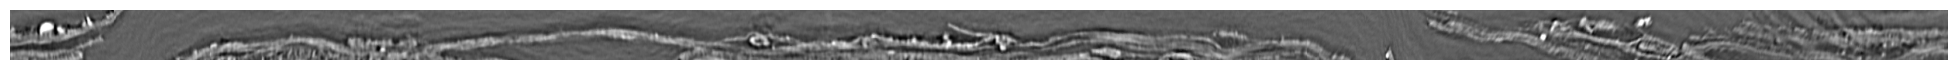

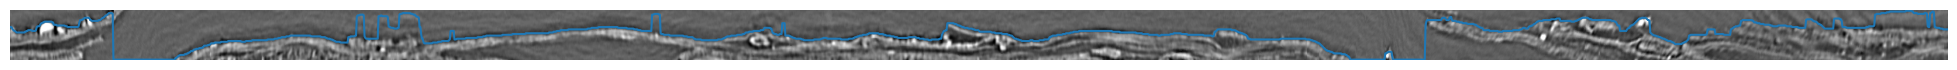

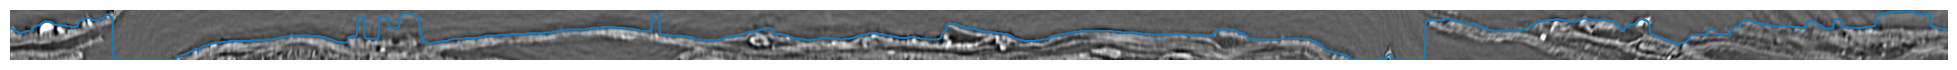

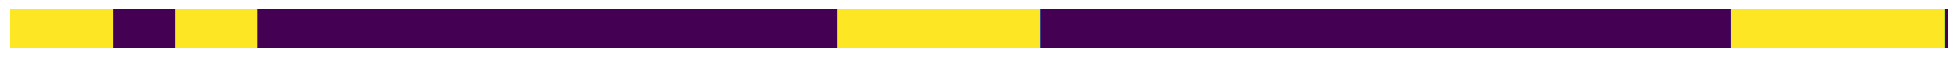

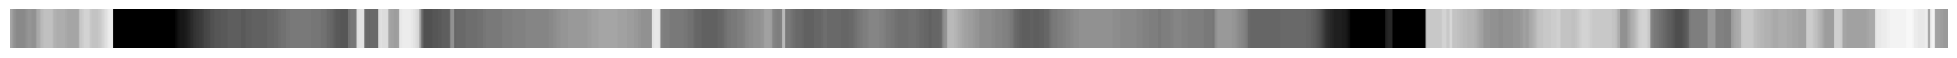

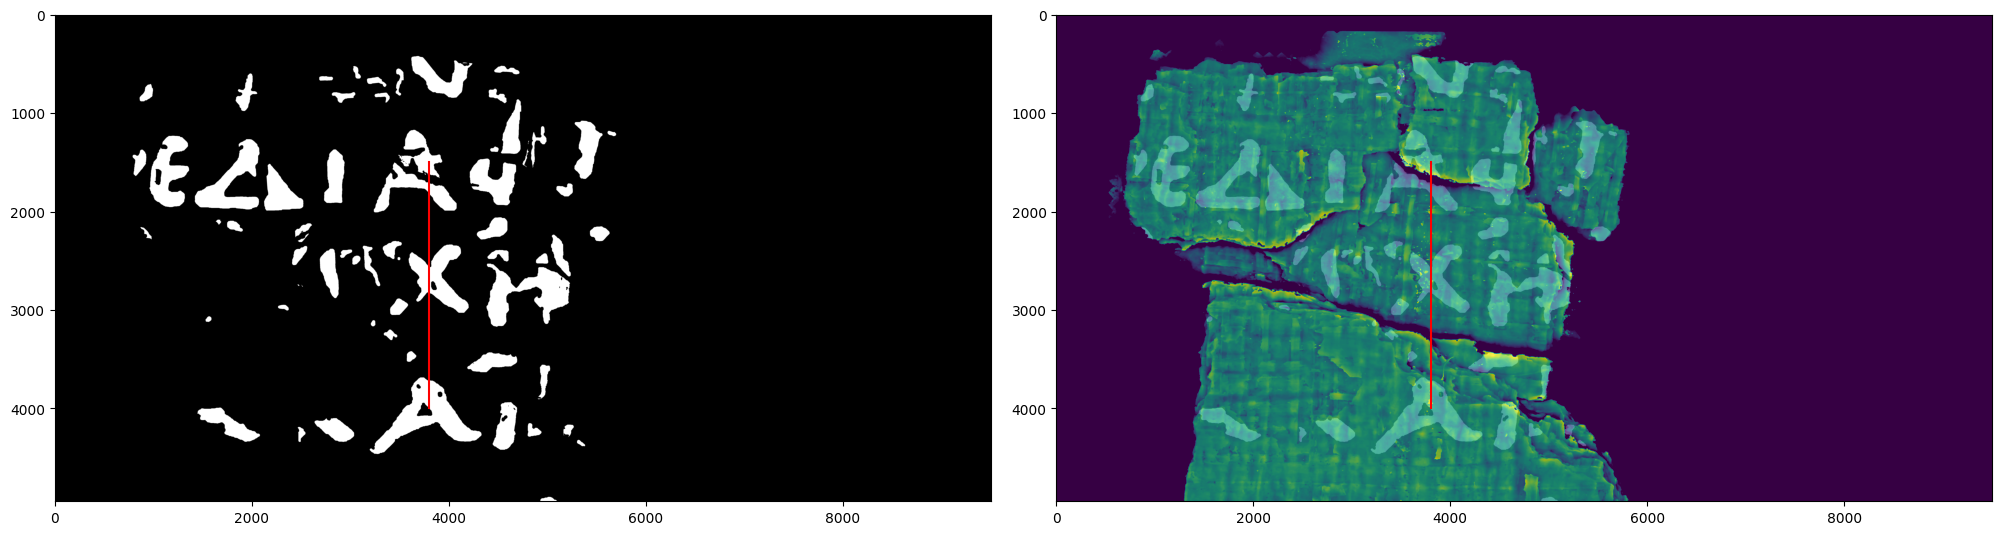

In [17]:
slice_at = 3800
slice_ = slice(1500, 4000)

plt.figure(figsize=(25, 2))
plt.imshow(np.flip(flatten_stack[:, slice_, slice_at], axis=0), cmap="gray")
plt.axis("off")

plt.figure(figsize=(25,2))
plt.imshow(np.flip(flatten_stack[:, slice_, slice_at], axis=0), cmap="gray")
plt.plot(64-topography[slice_.start : slice_.stop, slice_at : slice_at + 1][:, 0])
plt.axis("off")

plt.figure(figsize=(25,2))
plt.imshow(np.flip(flatten_stack[:, slice_, slice_at], axis=0), cmap="gray")
plt.plot(64-topography_[slice_.start : slice_.stop, slice_at : slice_at + 1][:, 0])
plt.axis("off")

plt.figure(figsize=(25, 2))
plt.imshow(inklabel[slice_.start:slice_.stop, slice_at : slice_at + 1].transpose(), aspect=50)
plt.axis("off")

plt.figure(figsize=(25, 2))
plt.imshow(topography[slice_.start:slice_.stop, slice_at : slice_at + 1].transpose(), aspect=50, cmap="gray", vmin=0,vmax=65)
plt.axis("off")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 25))

ax1.imshow(inklabel, cmap="gray")
ax1.plot([slice_at, slice_at], [slice_.start, slice_.stop], color="red")
ax1.set_ylim(inklabel.shape[0], 0)

ax2.imshow(topography)
ax2.imshow(inklabel, cmap="gray", alpha=0.2)
ax2.plot([slice_at, slice_at], [slice_.start, slice_.stop], color="red")
ax2.set_ylim(topography.shape[0], 0)
plt.subplots_adjust(wspace=0.07)

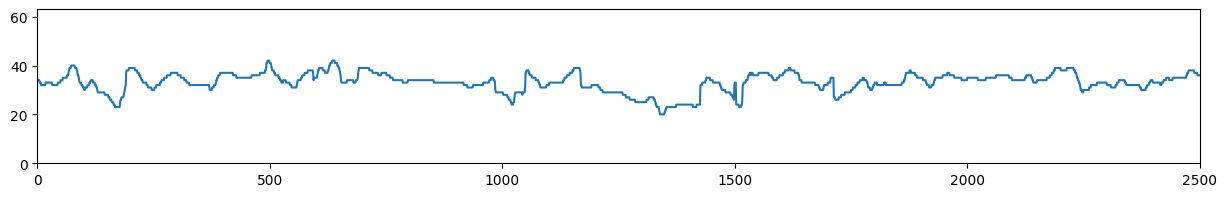

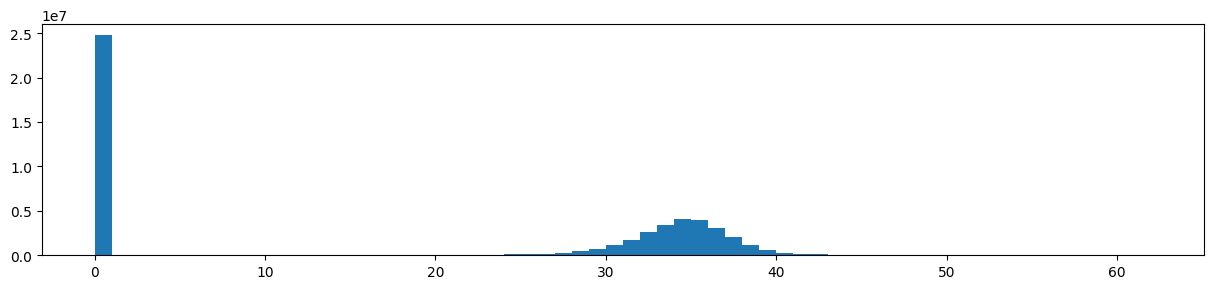

In [6]:
plt.figure(figsize=(15, 2))
plt.plot(topography[slice_.start : slice_.stop, slice_at : slice_at + 1][:, 0])
plt.xlim(0, slice_.stop - slice_.start)
plt.ylim(0, 63)

plt.figure(figsize=(15,3))
plt.hist(topography.flatten(), bins=topography.max());


In [11]:
np.unique(inklabel)

array([  0, 255], dtype=uint8)

In [12]:
np.unique(sea)

array([0, 1], dtype=uint8)

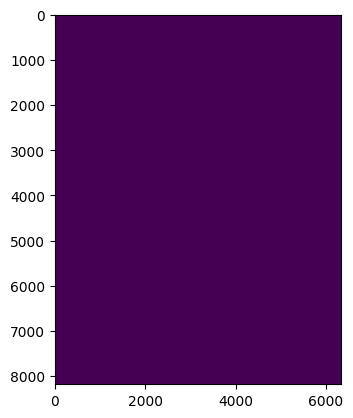

In [13]:
sea=np.where(topography<=0,1,0).astype("uint8")
plt.imshow(cv2.bitwise_and(sea, inklabel))

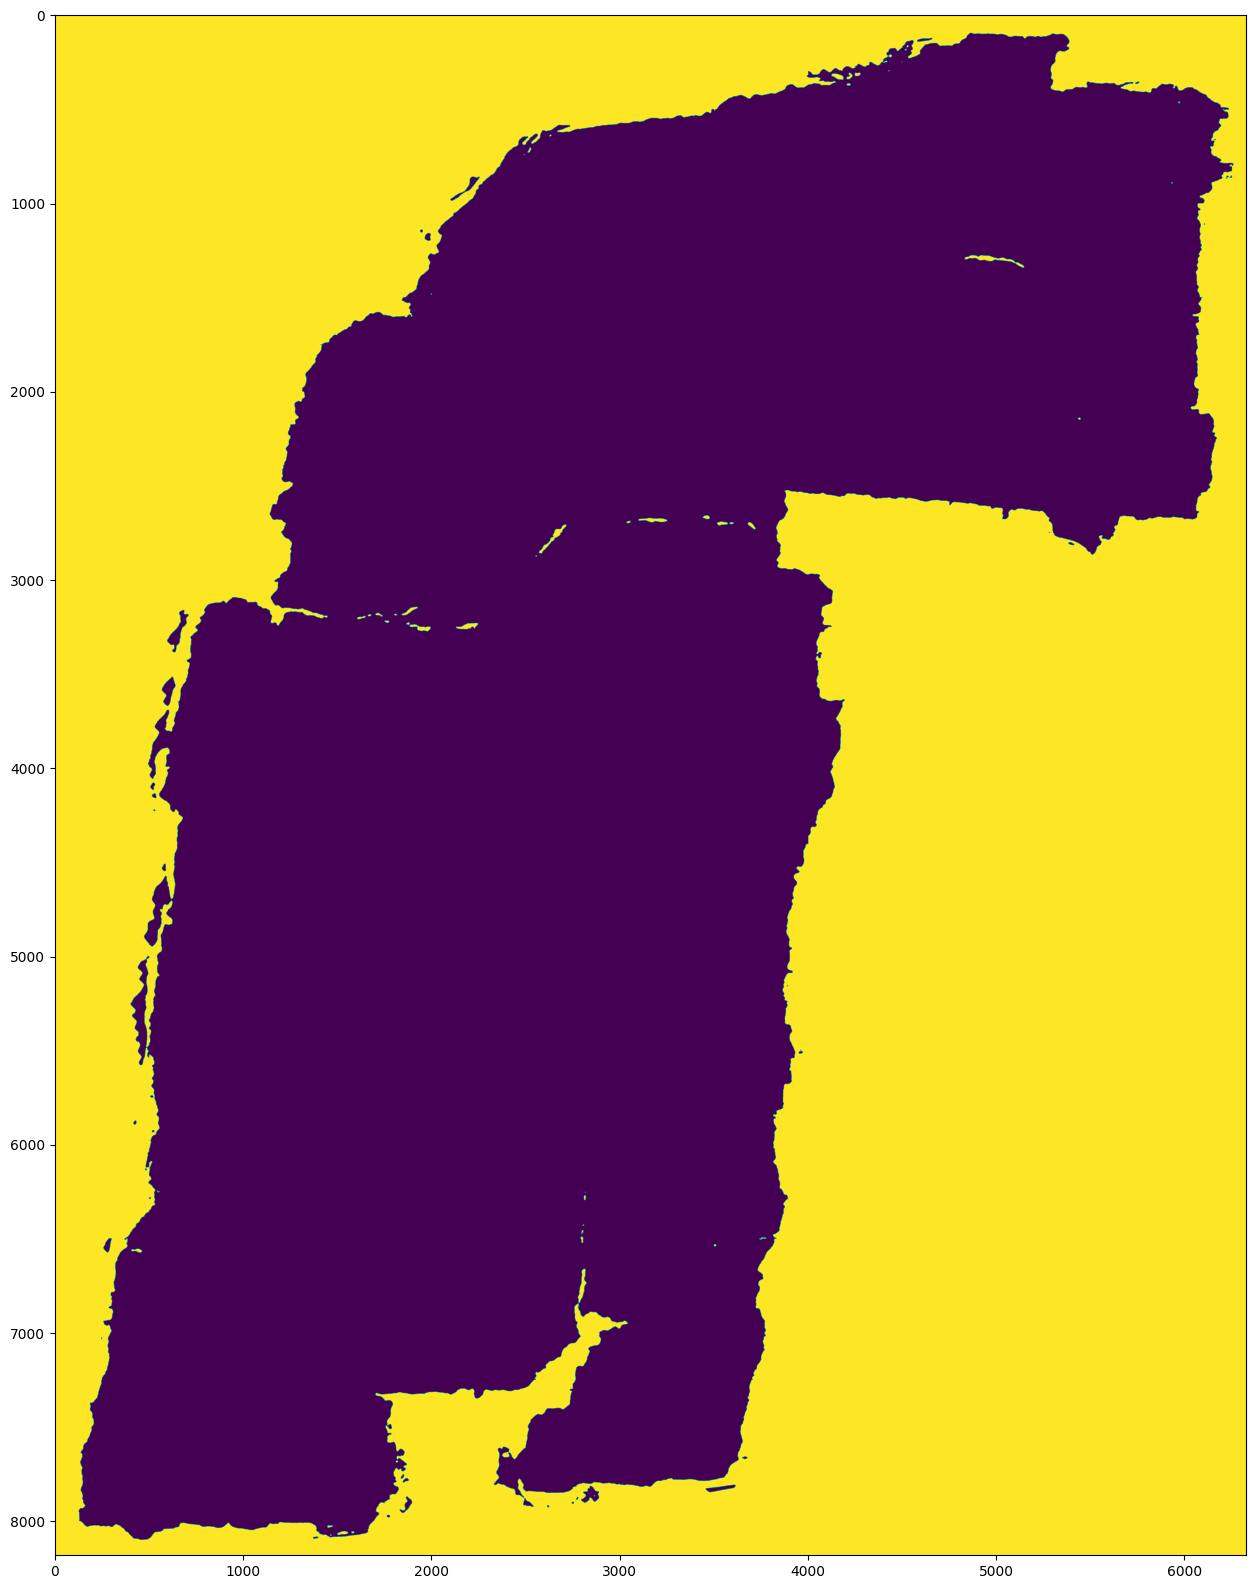

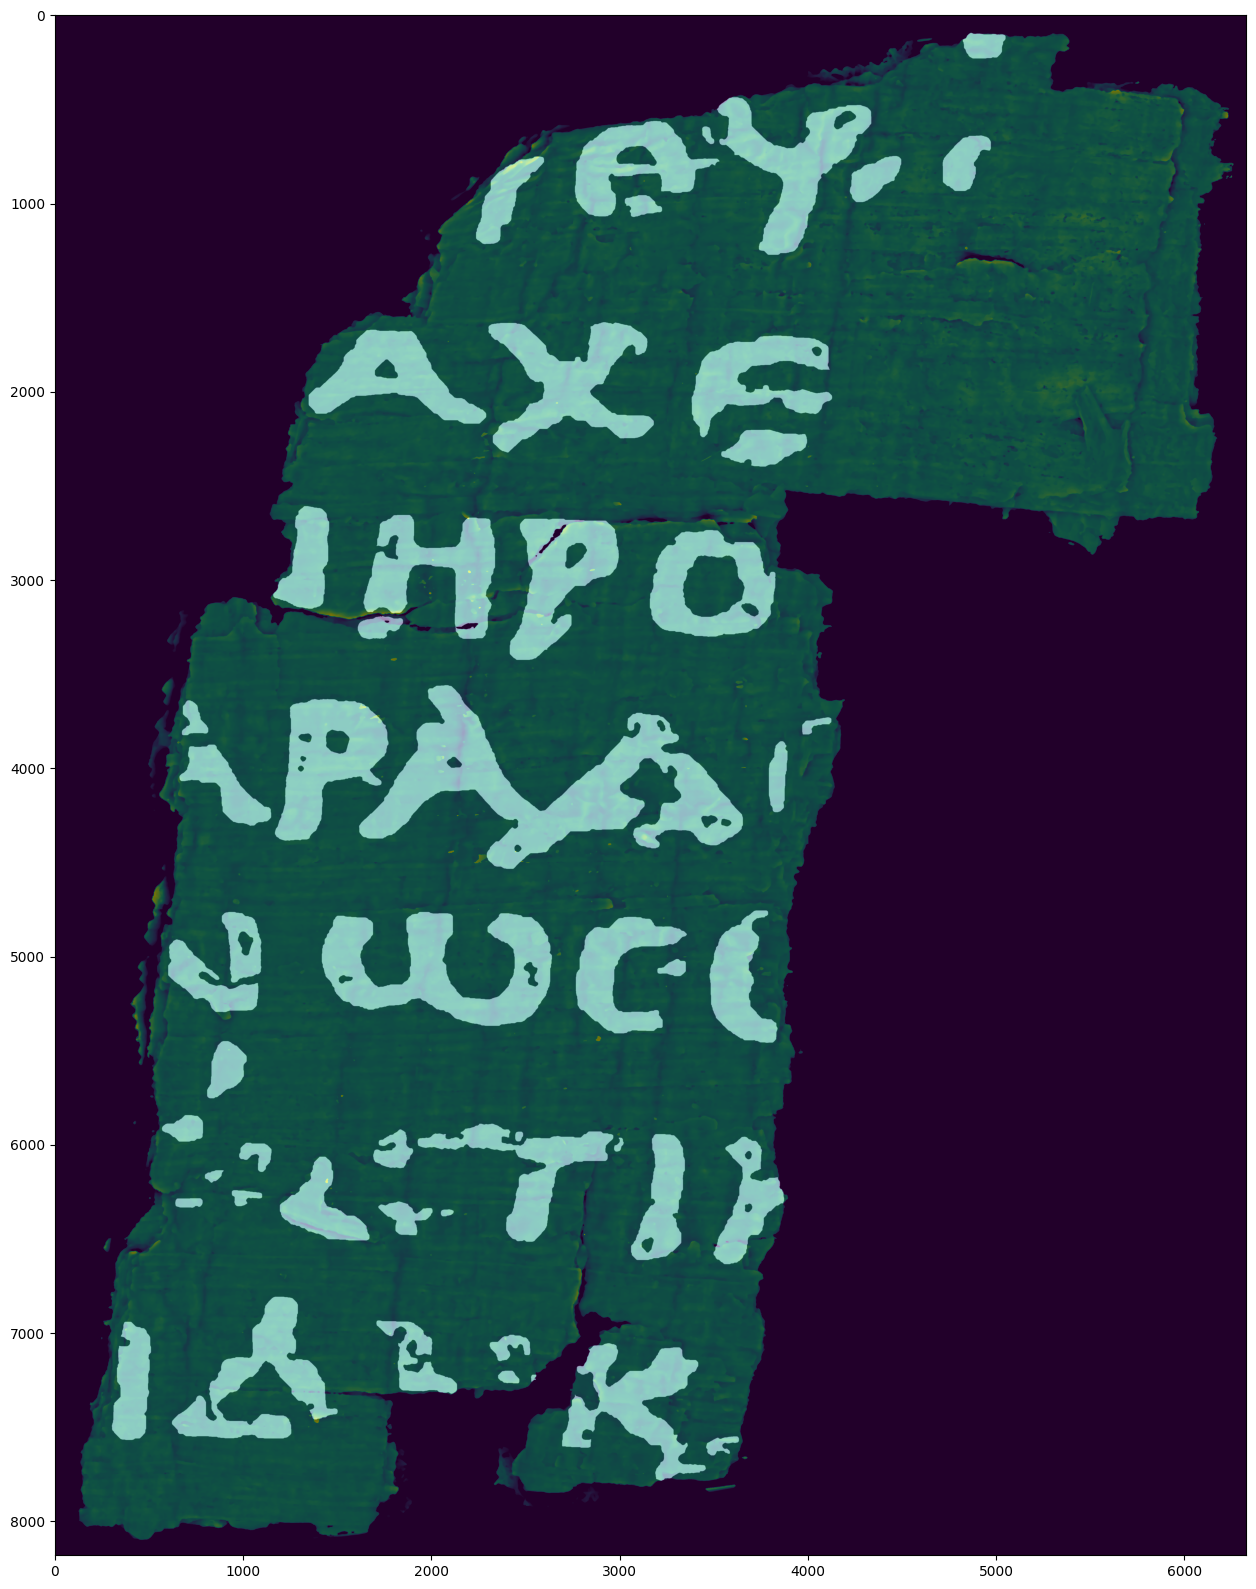

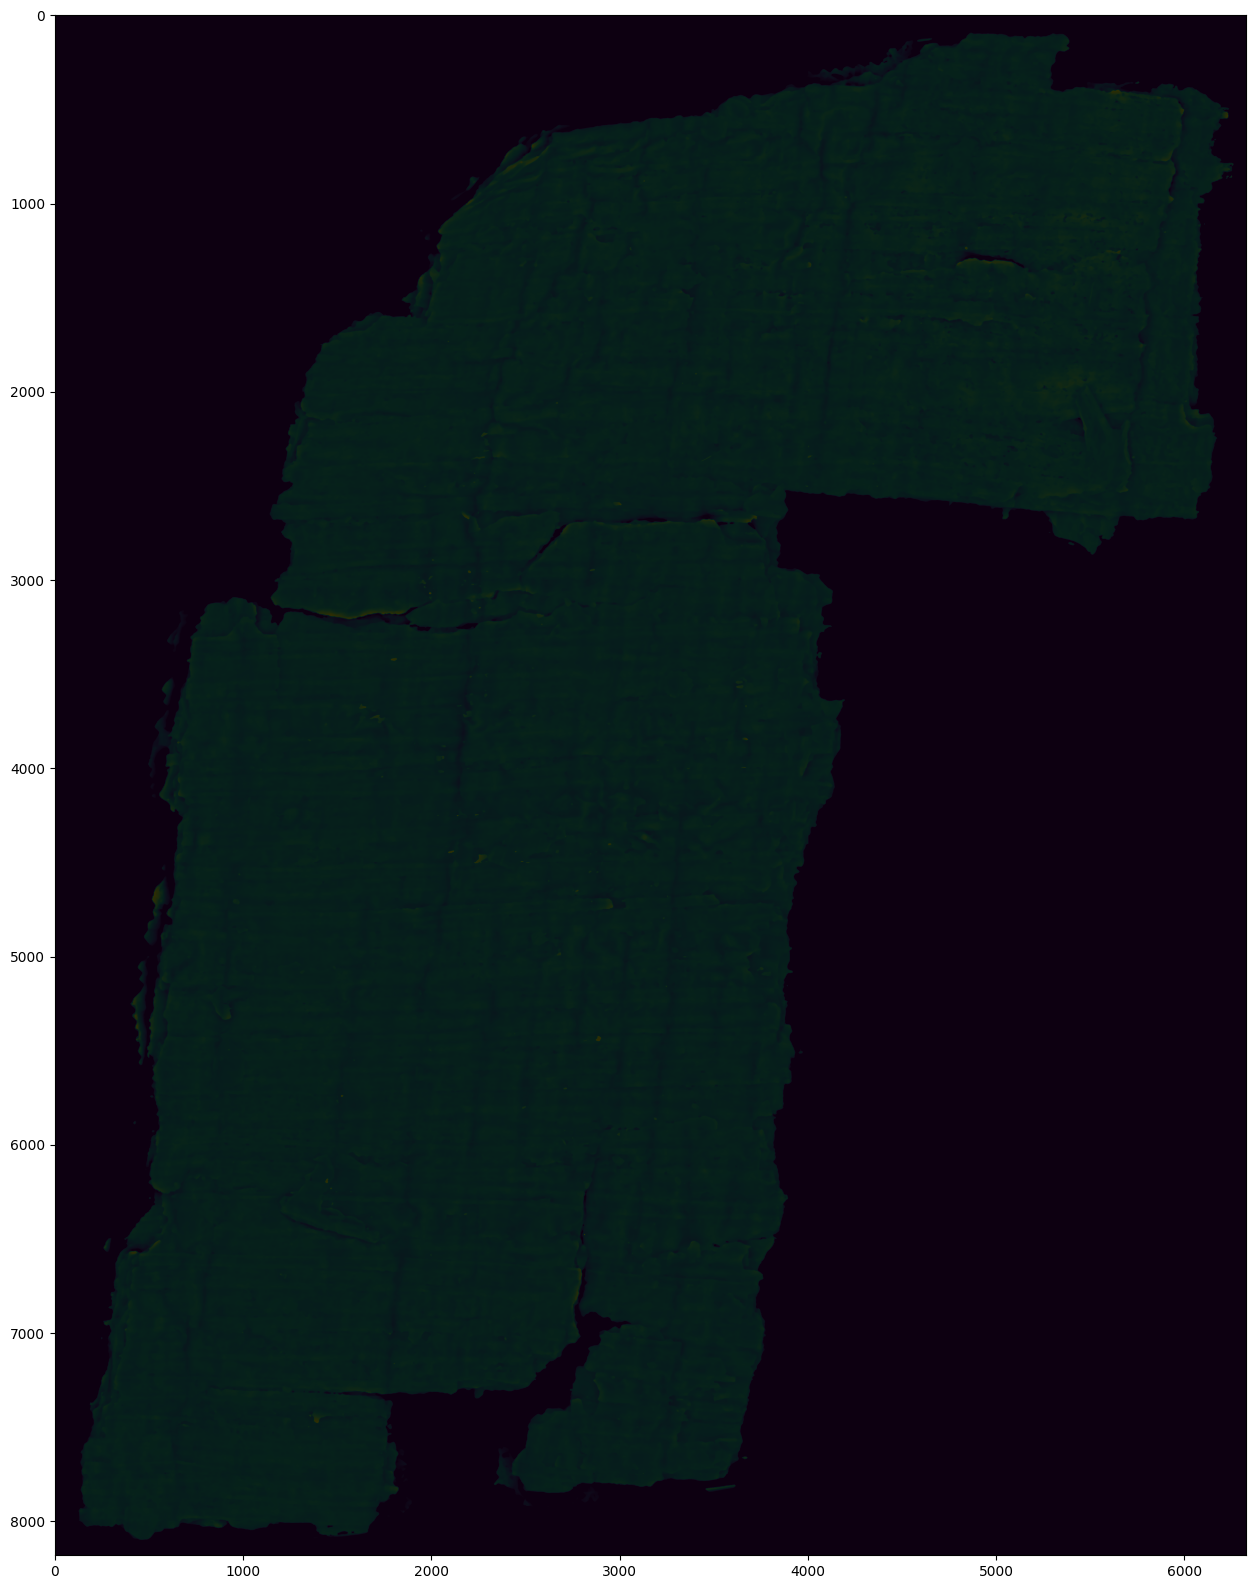

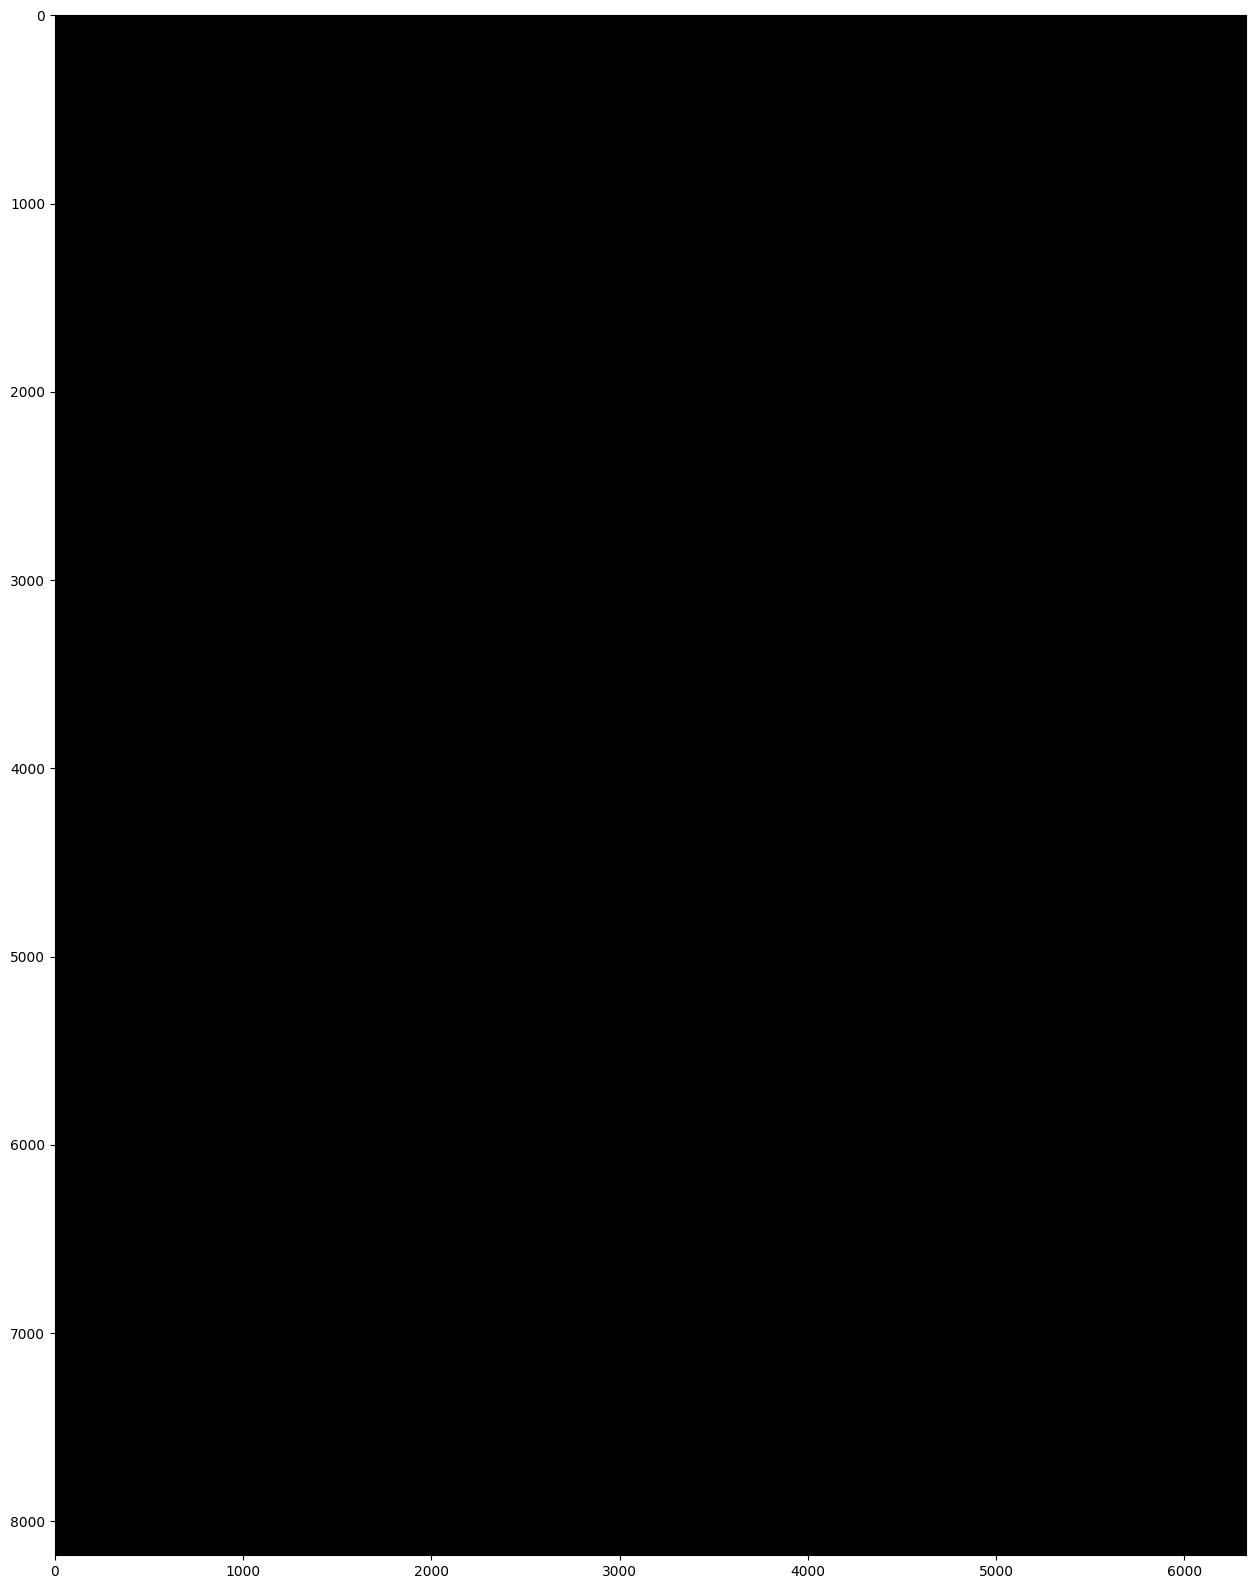

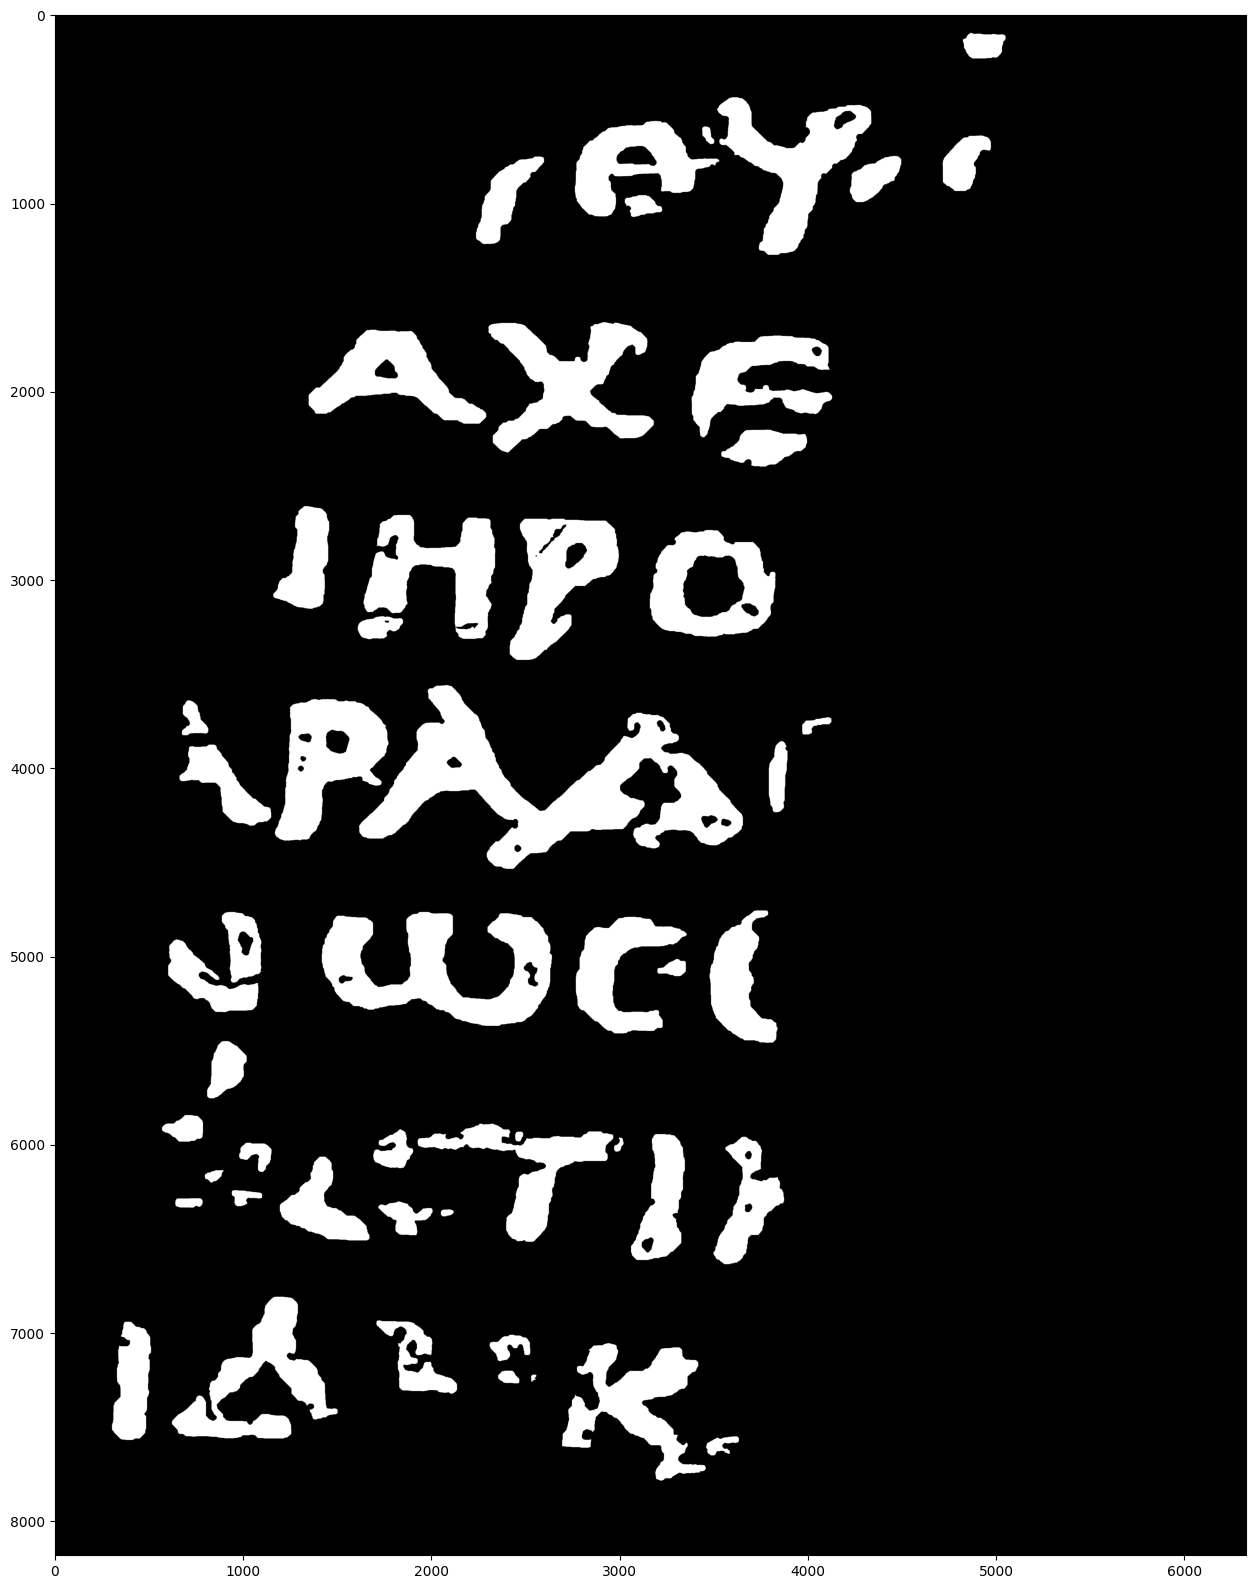

In [14]:
# inklabel=cv2.imread(f"/kaggle/input/vesuvius-challenge-ink-detection/train/1/inklabels.png",0)
sea=np.where(topography<=0,1,0).astype("uint8")
result = cv2.bitwise_and(sea, inklabel)
# inklabel=cv2.imread(f"/kaggle/working/dataset_train/inklabels_{fragment_i}_{split_i}.png",0)

plt.figure(figsize=(20, 20))
plt.imshow(sea)

plt.figure(figsize=(20, 20))
plt.imshow(topography)
plt.imshow(inklabel, cmap='gray', alpha=0.5)


plt.figure(figsize=(20, 20))
plt.imshow(topography)
plt.imshow(result, cmap='gray', alpha=0.8)

plt.figure(figsize=(20, 20))
plt.imshow(result, cmap='gray')

plt.figure(figsize=(20, 20))
plt.imshow(inklabel-result, cmap='gray')

In [22]:
cv2.imwrite("./tmp.png",result*255)

True

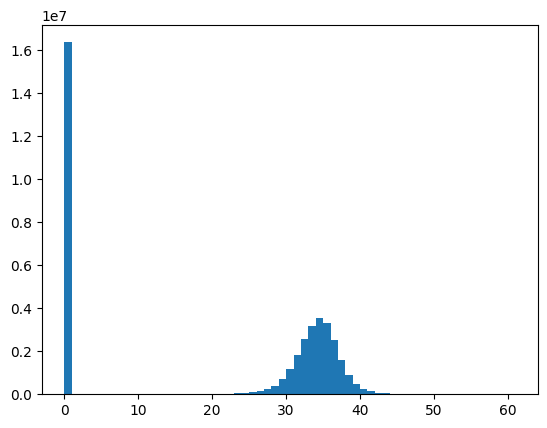

In [ ]:
plt.hist(topography.flatten(), bins=topography.max());

# debug

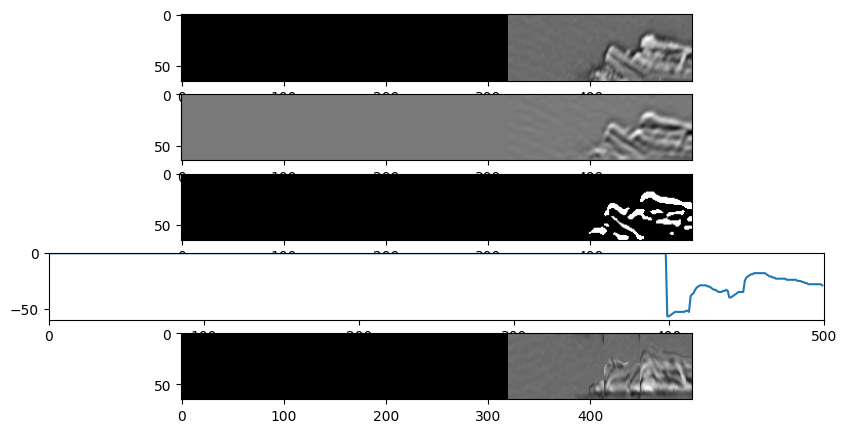

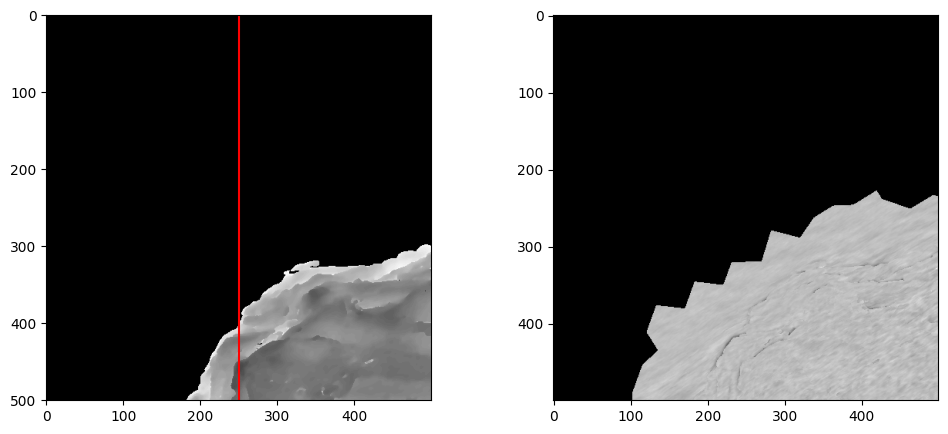

In [ ]:
image_stack=np.load(open("/kaggle/working/dataset_train/image_stack_3_0.npy", "rb"))
clipped_stack, gauss_stack, filtered_stack, topographic_map, flattened_stack = flatten(image_stack, 600, 1500, 500, 5)

slice_at = 250

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 5))
ax1.imshow(clipped_stack[:, :, slice_at], cmap='gray')
ax2.imshow(gauss_stack[:, :, slice_at], cmap='gray')
ax3.imshow(filtered_stack[:, :, slice_at], cmap='gray')
ax4.plot(topographic_map[:, slice_at]*-1)
ax4.set_xlim(0, clipped_stack.shape[1])
ax4.set_ylim(-60, 0)
ax5.imshow(flattened_stack[:, :, slice_at], cmap='gray')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(topographic_map, cmap='gray')
ax1.plot([slice_at, slice_at], [0, topographic_map.shape[0]], color='red')
ax1.set_ylim(topographic_map.shape[0], 0)
ax2.imshow(flattened_stack[10, :, :], cmap='gray')


(65, 7606, 5249)


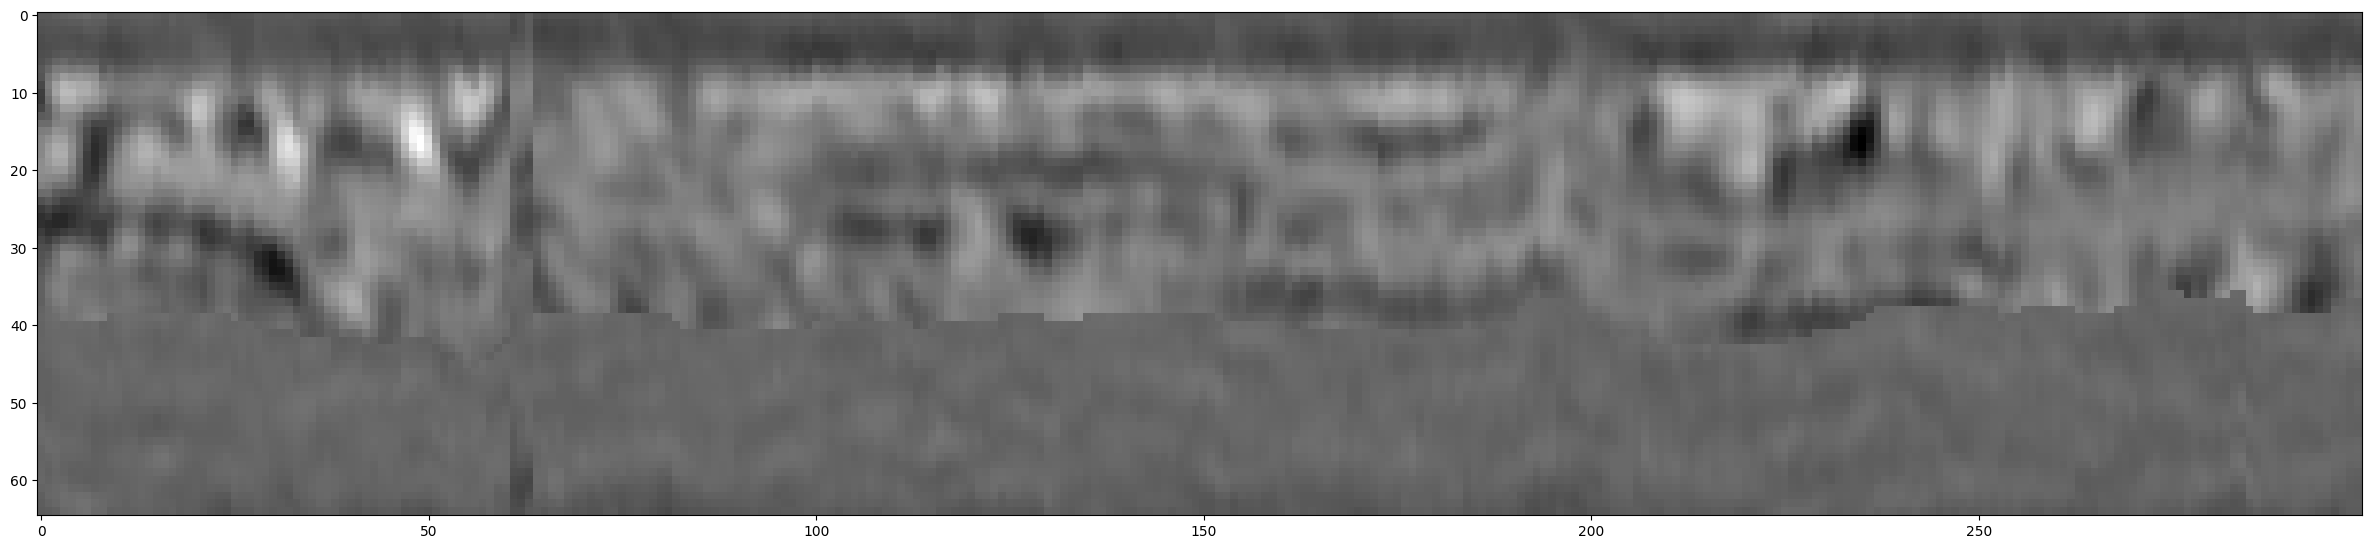

In [ ]:
slice_ = slice(1700, 2000)
slice_at = 2000
with open(f"/kaggle/working/dataset_train/flatten_unchanged/flatten_stack_3_0.npy", 'rb') as f:
    flatten_stack = np.load(f)
print(flatten_stack.shape)

plt.figure(figsize=(30, 30))
plt.imshow(np.flip(flatten_stack[:, slice_, slice_at],axis=0), cmap='gray')
plt.show()

(6, 300)


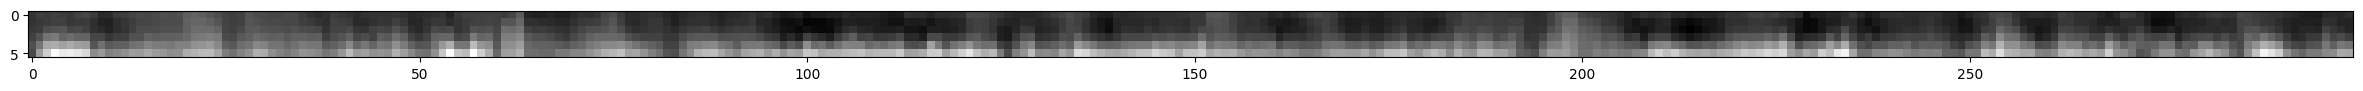

In [ ]:
print(flatten_stack[-9:-3, slice_, slice_at].shape)
plt.figure(figsize=(30, 30))
plt.imshow(np.flip(flatten_stack[-9:-3, slice_, slice_at],axis=0), cmap='gray')
plt.show()

(6, 300)


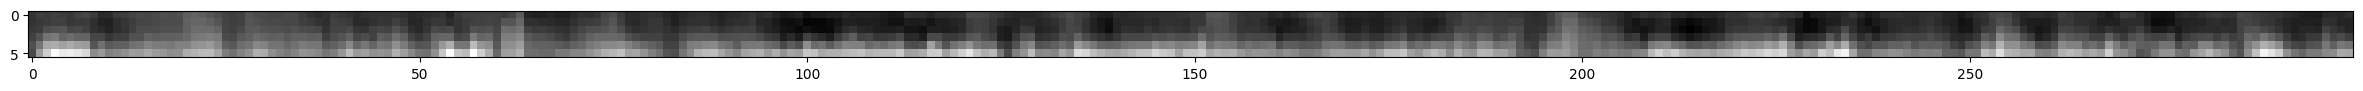

In [ ]:
slice_ = slice(1700, 2000)
slice_at = 2000
with open(f"/kaggle/working/dataset_train/flatten_unchanged/3-8/3_0.npy", 'rb') as f:
    image_stack = np.load(f)
print(image_stack[:, slice_, slice_at].shape)
plt.figure(figsize=(30, 30))
plt.imshow(np.flip(image_stack[:, slice_, slice_at],axis=0), cmap='gray')
plt.show()

65420


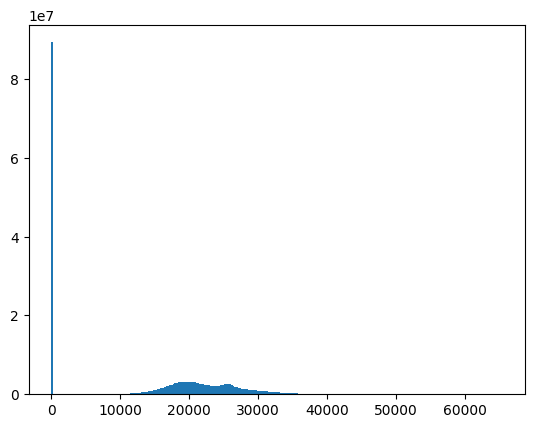

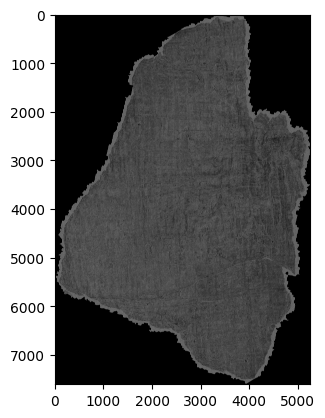

In [ ]:
print(image_stack.max())
plt.hist(image_stack.flatten(), bins=256);
plt.figure()
plt.imshow(image_stack[4],cmap='gray')
